In [1]:
import numpy as np
from sklearn import datasets
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [48]:
k = 2

In [51]:
data = datasets.make_blobs(n_samples=100, n_features=2, centers=k)

In [32]:
from matplotlib.colors import ListedColormap

In [35]:
def plot_2d_dataset(data, colors):
    pyplot.figure(figsize(8, 8))
    pyplot.scatter(list(map(lambda x: x[0], data[0])), list(map(lambda x: x[1], data[0])), c = data[1], cmap = colors)

In [33]:
colors = ListedColormap(['red', 'yellow', 'green'])

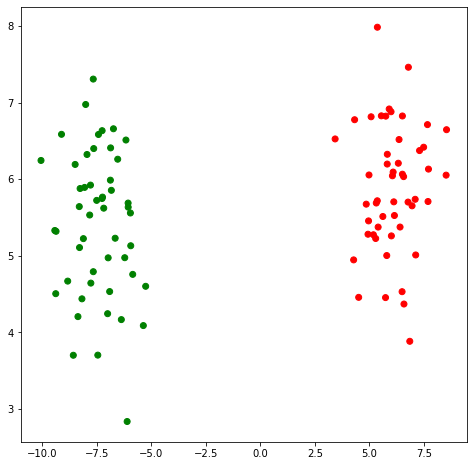

In [52]:
plot_2d_dataset(data, colors)

In [4]:
def modified_gram_schmidt_qr(A): # 5 pts
    # your code is here
    m = A.shape[0]
    n = A.shape[1]
    Q = A[:m, :min(m,n)].copy()
    R = np.zeros((min(m,n), n))
    Q[:, 0] = A[:, 0] / np.linalg.norm(A[:, 0])
    for i in range(min(m, n)):
        for j in range(i):
            Q[:, i] -= proj(Q[:, i], Q[:, j])      
        Q[:, i] = Q[:, i] / np.linalg.norm(Q[:, i])
        for k in range(i, n):
            R[i, k] = np.dot(Q[:, i], A[:, k])
            
    return Q, R

In [22]:
def proj(a, e):
    return e * np.dot(a, e)

def pivoted_QR(A):
    k = A.shape[0]
    n = A.shape[1]
    Q = np.zeros((k, k))
    R = np.zeros((k, n))
    B = A.copy()
    P = np.arange(n)
    for j in range(k):

        norms = np.linalg.norm(B[:, j:], axis=0)
        j_max = np.argmax(norms) + j
        P[[j, j_max]] = P[[j_max, j]]
        B[:, [j, j_max]] = B[:, [j_max, j]]
        R[:, [j, j_max]] = R[:, [j_max, j]]
        Q[:, j] = B[:, j] / np.linalg.norm(B[:, j])
    
        R[j, j] = np.linalg.norm(B[:, j])
        
        for i in range(j+1, n):
            R[j, i] = np.dot(Q[:, j], B[:, i])
        
        for i in range(j+1, n):
            B[:, i] -= proj(B[: , i], Q[:, j])
            

    return P, Q, R
        
            

In [58]:
from scipy.linalg import eigh

def PQR_clustering(A, k):
    ATA = A.T@A
    m = ATA.shape[0]
    vals, vecs = eigh(ATA, eigvals=(m-k, m-1))
    X = vecs
    P, Q, R = pivoted_QR(X.T)
    PT = np.argsort(P)
    R_hat = (np.linalg.inv(R[:, :k]) @ R)[:, PT]
    labels = np.argmax(np.abs(R_hat), axis=0)
    
    return labels

In [54]:
A = data[0].T

In [59]:
labels = PQR_clustering(A, k)

In [60]:
from sklearn.metrics.cluster import v_measure_score
v_measure_score(data[1], labels)

1.0

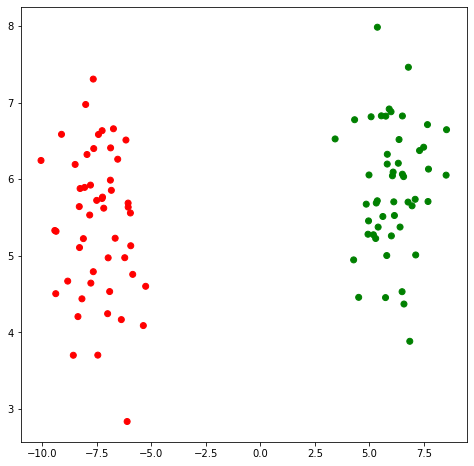

In [57]:
plt.scatter(A[0], A[1], c=labels, cmap=colors)